# TP04 - HMM

(27, 2)
(60, 2)


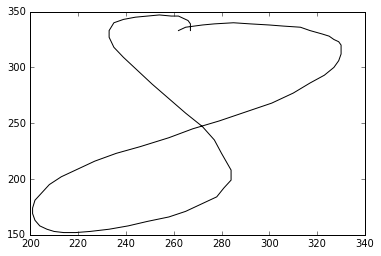

In [2]:
import numpy as np
from unipen import *

train_data, train_labels = loadUnipenData("pendigits-orig.tra")
test_data, test_labels = loadUnipenData("pendigits-orig.tes")

print(train_data[2].shape)
print(test_data[0].shape)

plotUnipen(train_data[0])

In [45]:
MAX_SAMPLING = 100

def sampling(data):
    result = np.empty((len(data), 100, 2))
    for i in range(0, len(data)):
        vec = data[i]
        
        params_ind = np.where(vec[:, 0] == -1)[0]        
        ind_downs = params_ind[np.where(vec[params_ind, 1].flatten() == -1)]
        ind_ups = params_ind[np.where(vec[params_ind, 1].flatten() == 1)]
        
        # Computes the factor by line
        total_ratio = 0
        for j in range(0, ind_downs.shape[0]):
            line = vec[(ind_downs[j] + 1):(ind_ups[j] - 1)]
            total_ratio += line.shape[0]
        total_ratio = MAX_SAMPLING / total_ratio
        
        # Loops through every drawing
        # as a number has several
        previous = None
        for j in range(0, ind_downs.shape[0]):
            line = vec[(ind_downs[j] + 1):(ind_ups[j] - 1)]
            length = line.shape[0]
            new_len = (int)(length * total_ratio)
            if new_len < 100:
                new_len = 100
            indices = [(int)(k * total_ratio) if k * total_ratio < length else length - 1 for k in range(0, new_len)]
            masked = line[indices]
            if previous is None:
                previous = masked
            else:
                previous = np.concatenate((previous, masked), axis=0)
        result[i] = previous
    return result

sampling(train_data)

ValueError: could not broadcast input array from shape (200,2) into shape (100,2)